# Part I - (Dataset Exploration Title)
## by (Adeniya Adenike)


In [54]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [55]:
# Import all packages and set plots to be embedded inline
from requests import get
from os import path, getcwd, makedirs, listdir 
from io import BytesIO
from zipfile import ZipFile
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns
import datetime
import math
import calendar
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image
%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [56]:
#examine dataframe

trip_data= pd.read_csv('tripdata.csv')

trip_data.head()


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [57]:
##(trip_data[trip_data['end_station_name'] == 'san francisco'])
Station_name = trip_data['end_station_name'].str.contains('san')
Station_name

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
183382    False
183383    False
183384    False
183385    False
183386    False
183387    False
183388    False
183389    False
183390    False
183391    False
183392    False
183393    False
183394    False
183395    False
183396    False
183397    False
183398    False
183399    False
183400    False
183401    False
183402    False
183403    False
183404    False
183405    False
183406    False
183407    False
183408    False
183409    False
183410    False
183411    False
Name: end_station_name, 

In [58]:
trip_data[trip_data['end_station_name'].str.contains('san francisco', na=False)]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip


In [59]:
(trip_data['end_station_name'].eq('san francisco')).any()

False

In [60]:
#The dataframe statistics
trip_data.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [61]:
#Samples
trip_data.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
2291,693,2019-02-28 18:08:56.0040,2019-02-28 18:20:29.1600,363.0,Salesforce Transit Center (Natoma St at 2nd St),37.787492,-122.398285,89.0,Division St at Potrero Ave,37.769218,-122.407646,5248,Customer,1983.0,Male,No
29654,308,2019-02-25 06:57:56.8530,2019-02-25 07:03:05.1750,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,1917,Subscriber,1964.0,Female,No
75708,227,2019-02-19 08:56:41.1080,2019-02-19 09:00:28.9500,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,17.0,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,5531,Subscriber,1990.0,Male,No
105360,254,2019-02-14 06:59:22.7410,2019-02-14 07:03:37.4010,27.0,Beale St at Harrison St,37.788059,-122.391865,66.0,3rd St at Townsend St,37.778742,-122.392741,6442,Subscriber,1985.0,Male,No
80282,2425,2019-02-18 15:24:52.2930,2019-02-18 16:05:17.9080,141.0,Valencia St at Cesar Chavez St,37.747998,-122.420219,146.0,30th St at San Jose Ave,37.742314,-122.423180,6579,Subscriber,1988.0,Female,No
14896,304,2019-02-27 10:44:41.7240,2019-02-27 10:49:46.2060,61.0,Howard St at 8th St,37.776513,-122.411306,349.0,Howard St at Mary St,37.781010,-122.405666,5296,Subscriber,1993.0,Male,No
50168,353,2019-02-21 19:40:57.3720,2019-02-21 19:46:51.1540,58.0,Market St at 10th St,37.776619,-122.417385,76.0,McCoppin St at Valencia St,37.771662,-122.422423,4397,Subscriber,1994.0,Female,No
30145,238,2019-02-24 21:54:24.4640,2019-02-24 21:58:22.5480,240.0,Haste St at Telegraph Ave,37.866043,-122.258804,266.0,Parker St at Fulton St,37.862464,-122.264791,5604,Subscriber,1999.0,Male,No
137860,555,2019-02-08 08:16:09.1490,2019-02-08 08:25:24.8520,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,201.0,10th St at Fallon St,37.797673,-122.262997,1966,Customer,1990.0,Female,No
16087,1131,2019-02-27 08:37:36.8640,2019-02-27 08:56:28.0220,375.0,Grove St at Masonic Ave,37.774836,-122.446546,36.0,Folsom St at 3rd St,37.783830,-122.398870,4968,Subscriber,1900.0,Male,No


In [62]:
## Get the dataset info for cleaning

trip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [63]:
## Get the sum of null values for cleaning

trip_data.isnull().sum().sum()

17318

In [64]:
## Get the colums with na for cleaning

trip_data.columns[trip_data.isna().any()].tolist()

['start_station_id',
 'start_station_name',
 'end_station_id',
 'end_station_name',
 'member_birth_year',
 'member_gender']

In [65]:
## drop all na 

trip_data.dropna(inplace= True)

In [66]:
trip_data.isnull().sum().sum()

0

In [67]:
trip_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null object
end_time                   174952 non-null object
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.7+ MB


In [68]:
trip_data['member_birth_year'].min()

1878.0

In [69]:
len(trip_data)

174952

In [70]:
trip_data['member_birth_year'].nsmallest(n=10)

27370    1878.0
1285     1900.0
10827    1900.0
16087    1900.0
19375    1900.0
21424    1900.0
21506    1900.0
24042    1900.0
26133    1900.0
27675    1900.0
Name: member_birth_year, dtype: float64

Text(0.5,0,'Age bike riders')

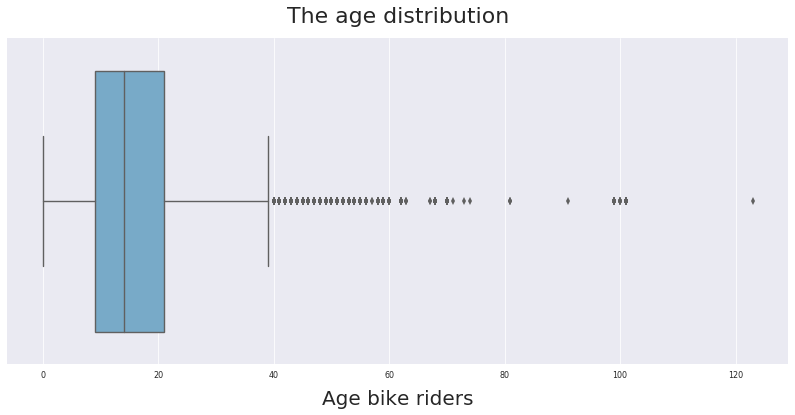

In [71]:
#Set visualization style

sns.set_style('darkgrid')
sns.set_context('paper')

# Filter data to include reasonable member age range
trip_data['member_age'] = 2001-trip_data['member_birth_year']

plt.figure(figsize=(14,6))
sns.boxplot(x='member_age', data=trip_data, palette='Blues', orient='h')
plt.title("The age distribution", fontsize=22, y=1.03)
plt.xlabel("Age bike riders", fontsize=20, labelpad=10)

##plt.figure(figsize=(14,6))
##seaborn.boxplot()

95 percent of users are between the ages of 18 and 60, as shown in the distribution graph. Although they make up a small portion, there were users who were over 60. Therefore, we may eliminate those who are over 60.

In [72]:
trip_data= trip_data[trip_data['member_age'] <=60]

In [73]:
trip_data['member_age'].mean()

16.122335464008376

> The average age of Ford bike users is 16

## What is the structure of your dataset

>The original dataset had 18341 entries & 16 columns. After the data was cleaned with
the removal of na, the dataset reduced to 174952 entries and 16 colums.

>The last two columns are discrete features and the first one is a continuos feature.


Now Let's ask some questions based on our features:


**The dataset after cleaning contains 174952 trips with 15 features. The features are:**
> 1. duration_sec : duration for the trip in second
2. start_station_name : the trip start station name
3. end_station_name : the trip end station name
4. start_station_latitude : start station latitude location
5. end_station_latitude : end station latitude location
6. user_type : Members divided to Subscriber (subscribe to the service) or Customer (normal customer)
7. start_date : the date at which the trip start
8. end_date : the date at which the trip end
9. start_station_longitude : start station longitude location
10. end_station_longitude : end station longitude location
11. start_week : the day of the week at which the trip start (Saturday, Sunday, Monday, Tuesday, Wednesday, Thursday and Friday)
12. end_week : the day of the week at which the trip end (Saturday, Sunday, Monday, Tuesday, Wednesday, Thursday and Friday)
13. start_day : start day of the month (1-31)
14. end_day : end day of the month (1-31)
15. bike_share_for_all_trip : bike share for all trips
16. member_birth_year: birth year for users
17. member_gender: users gender (Male, Female)

In [74]:
# helper function

def label(x, y, t):
    """
    Args:
    x (str): x-axis label
    y (str): y-axis label
    t (str): plot title
    
    Returns:
    None
    """
    
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(t)
    
    plt.show()

## Univariate Exploration


**1. How long does the average trip take?**

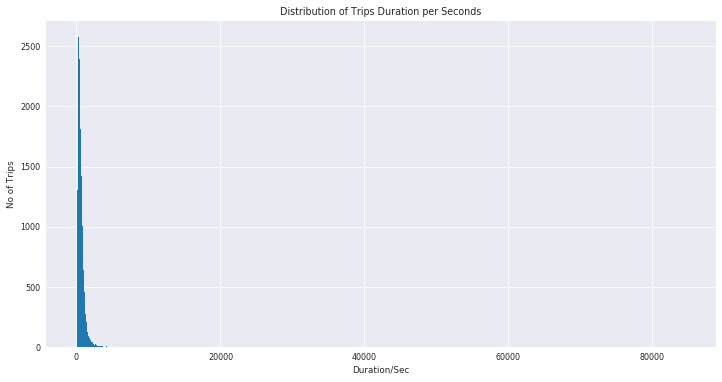

In [75]:
# start with trip duration histogram
binsize = 10
bins = np.arange(0, trip_data['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=(12, 6))
plt.hist(data = trip_data, x = 'duration_sec', bins = bins)
label(x='Duration/Sec', y='No of Trips', t='Distribution of Trips Duration per Seconds')

**Distribution of trips seem skewed to the right. The duration of the trip will be limited to avoid skewness

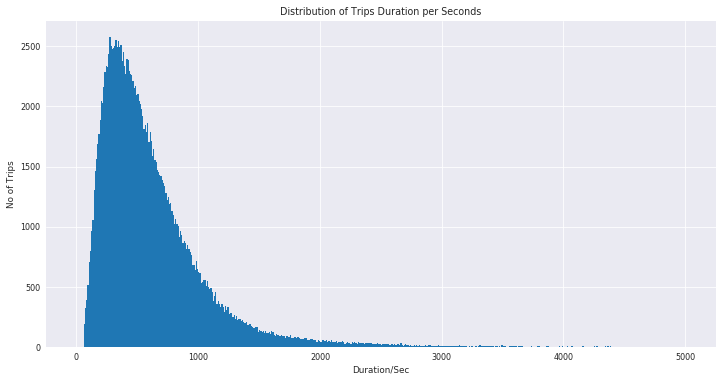

In [76]:
# start with trip duration histogram
binsize = 10
xlim = 10000 / 2 # seconds
bins = np.arange(0, xlim+binsize, binsize)

plt.figure(figsize=(12, 6))
plt.hist(data = trip_data, x = 'duration_sec', bins = bins)
label(x='Duration/Sec', y='No of Trips', t='Distribution of Trips Duration per Seconds')

**It be better to use log scale instead of limitaions**

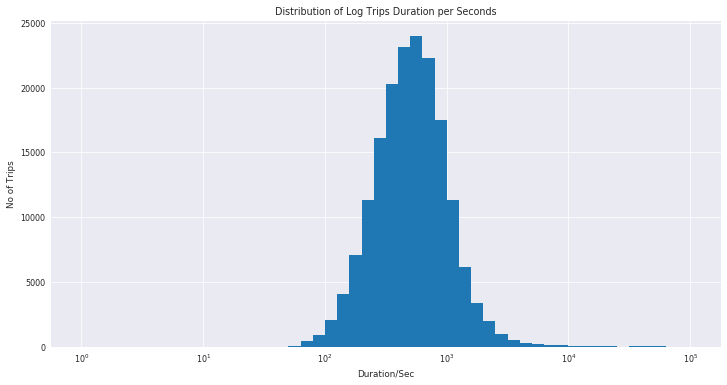

In [77]:
# log trip duration histogram
bins = 10 ** np.arange(0, np.log10(trip_data['duration_sec'].max())+0.1, 0.1)

plt.figure(figsize=(12, 6))
plt.hist(data = trip_data, x = 'duration_sec', bins = bins)
plt.xscale('log')

label(x='Duration/Sec', y='No of Trips', t='Distribution of Log Trips Duration per Seconds')

> **Distribution are symmetric with peak value at 500 second ~(about 8 minutes) which reasonable for a short rides.**

### Bikes Share and User Type

In [78]:
bike_counts = trip_data['bike_share_for_all_trip'].value_counts()
bike_counts

No     157457
Yes     17292
Name: bike_share_for_all_trip, dtype: int64

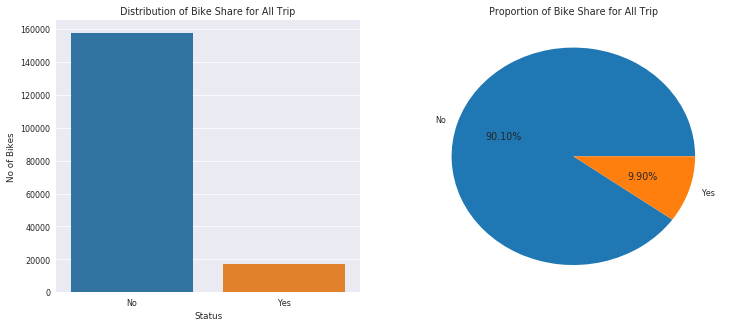

In [79]:
# let's now show no of bike_share_for_all_trip

plt.figure(figsize=[12, 5])

plt.subplot(1, 2, 1)
sns.countplot(data = trip_data, x = 'bike_share_for_all_trip')

plt.title('Distribution of Bike Share for All Trip')
plt.ylabel('No of Bikes')
plt.xlabel('Status')

plt.subplot(1, 2, 2)
plt.pie(bike_counts, labels = bike_counts.index, autopct='%1.2f%%')
plt.title('Proportion of Bike Share for All Trip')

plt.show()

> **The following figure show that +90% of users does not share the bikes for all trip.**

In [80]:
user_counts = trip_data['user_type'].value_counts()
user_counts

Subscriber    158196
Customer       16553
Name: user_type, dtype: int64

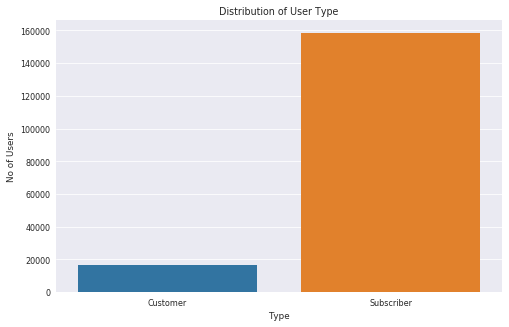

In [81]:
# let's now show no of user_type

plt.figure(figsize=[8, 5])

sns.countplot(data = trip_data, x = 'user_type')
label(x='Type', y='No of Users', t='Distribution of User Type')

>**The following figure shows that +90% of users are subscribers and only +9% are customers.**

### Start and End Stations

In [82]:
st_stations = trip_data.start_station_name.value_counts()[:15]
end_stations = trip_data.end_station_name.value_counts()[:15]

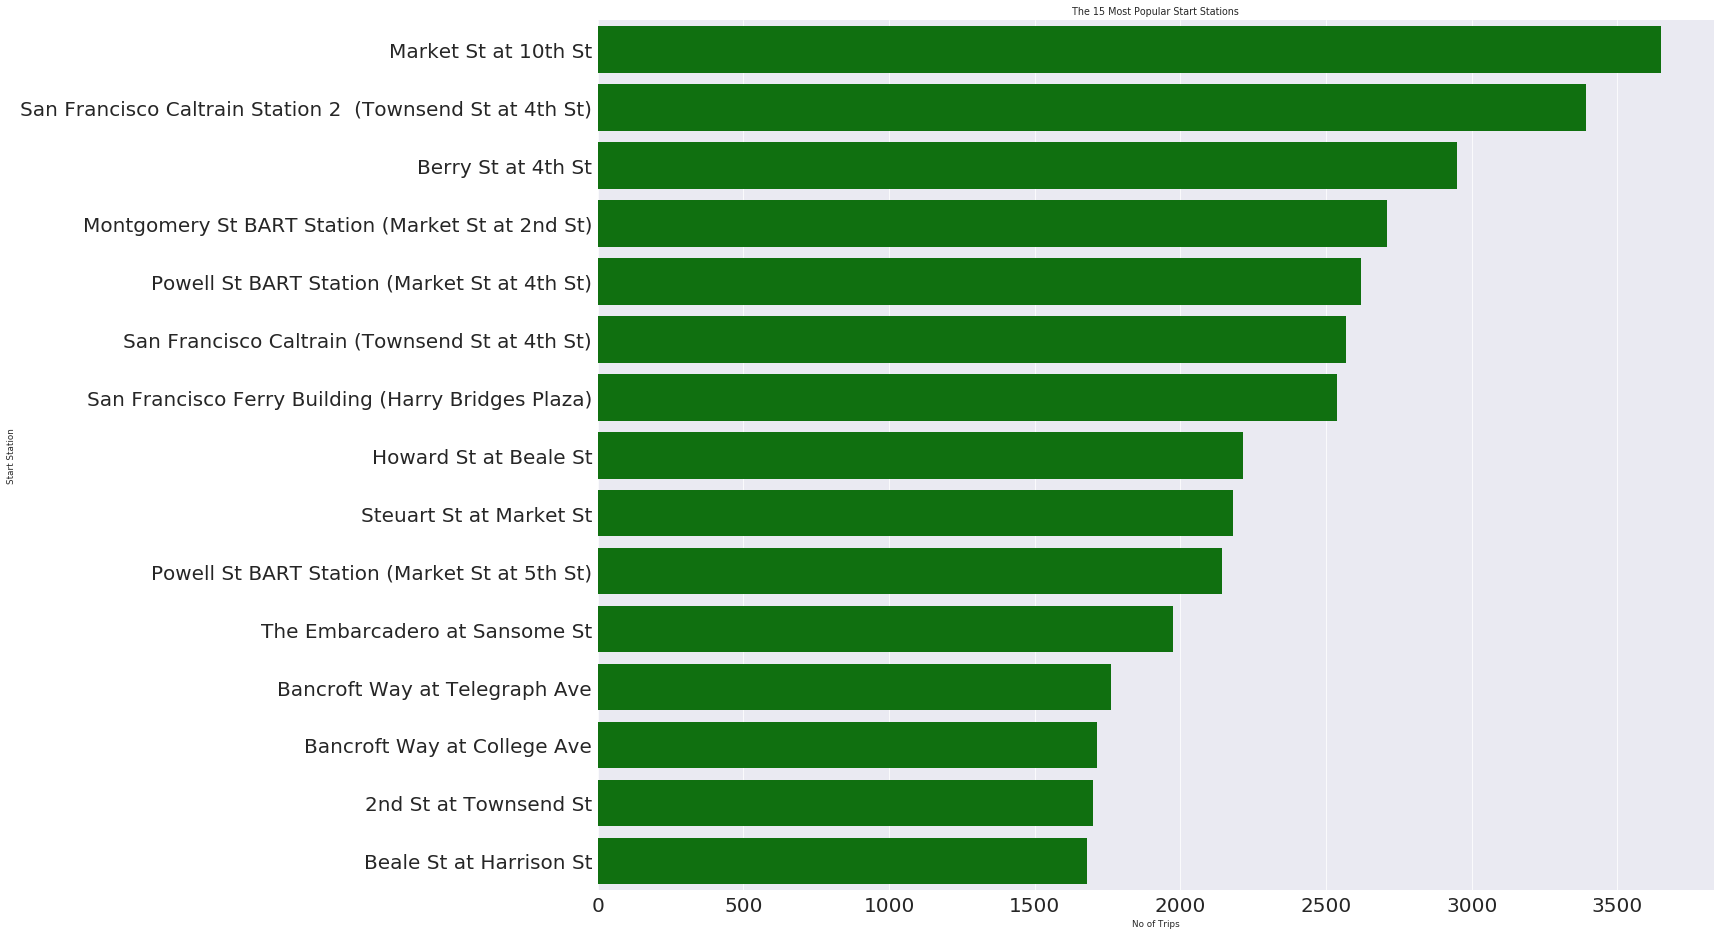

In [83]:
# start staion
plt.figure(figsize=[20, 16])

sns.barplot(y=st_stations.index, x= st_stations, color='g')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

label(y='Start Station', x='No of Trips', t='The 15 Most Popular Start Stations')

> **The avarage No. of trips between Top-15 end station is +1K trip with Market St at 10th St the highest trips (3500)**

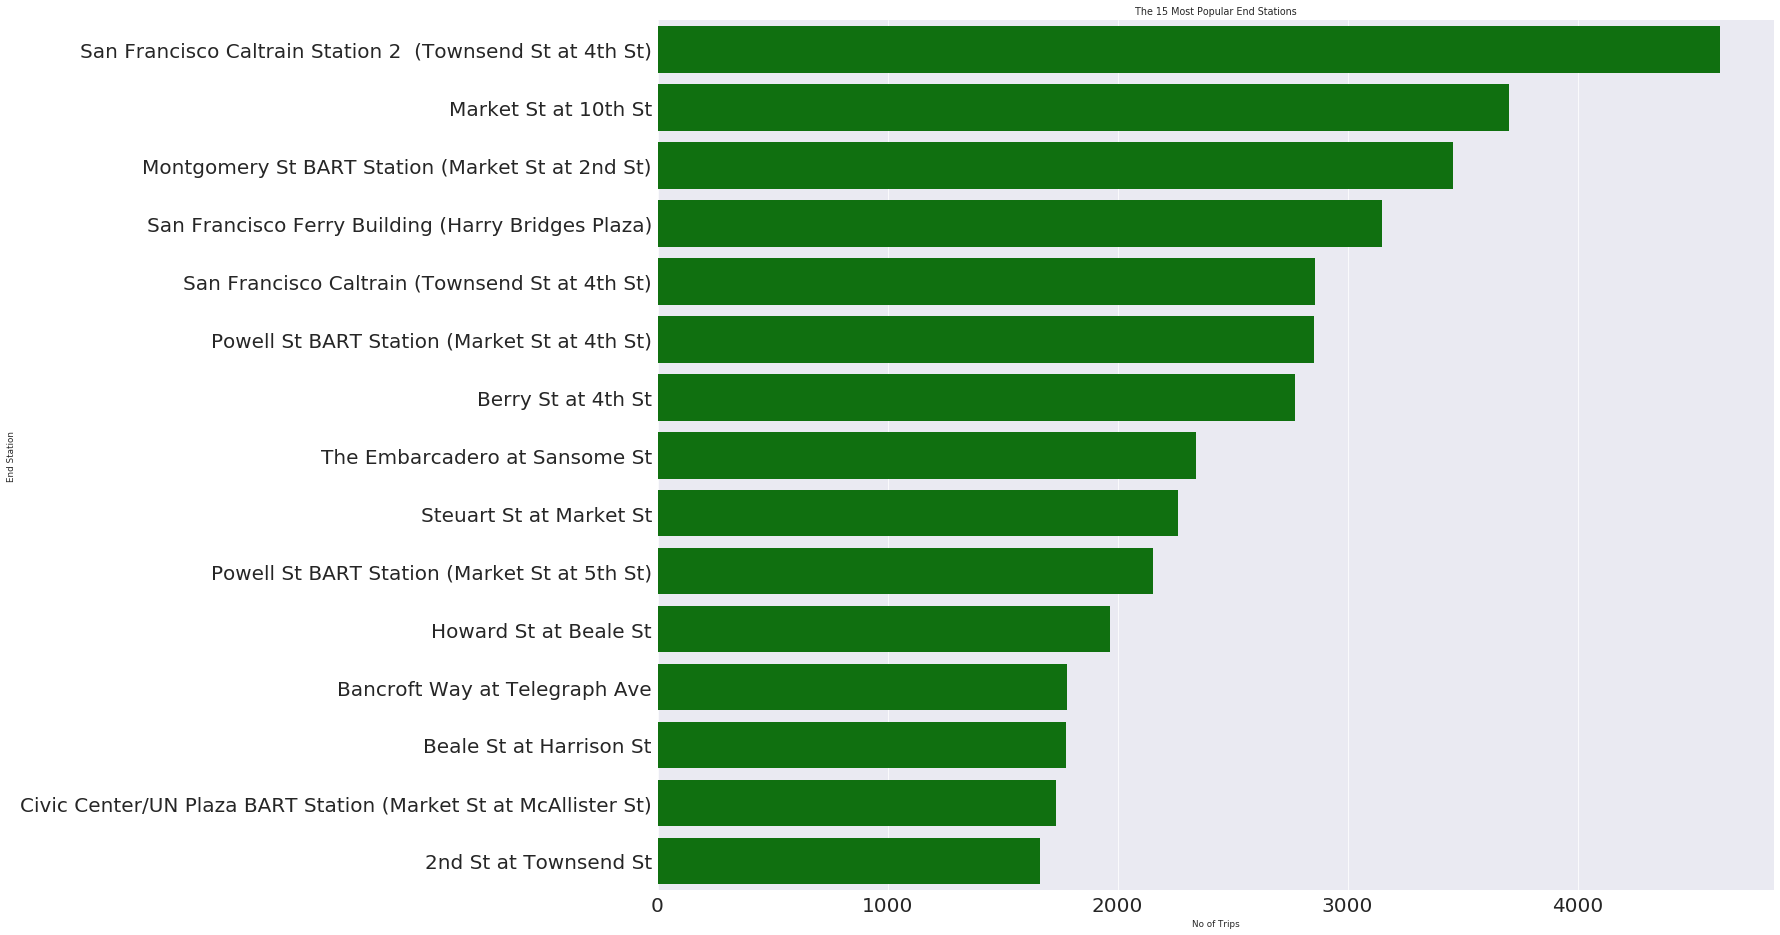

In [84]:
# end staion
plt.figure(figsize=[20, 16])

sns.barplot(y=end_stations.index, x= end_stations, color='g')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

label(y='End Station', x='No of Trips', t='The 15 Most Popular End Stations')

> **The avarage No. of trips between Top-15 end staion is +1K trip

### Gender

## Birth Year

**Birth year could give us new feature related to users age**

In [85]:
trip_data['age'] = 2019 - trip_data['member_birth_year']
trip_data['age'] = trip_data['age'].astype('int')

trip_data.drop(['member_birth_year'], axis=1, inplace=True)

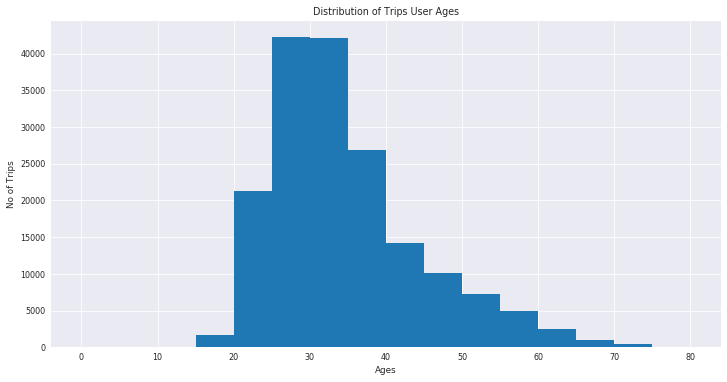

In [86]:
# start with trip duration histogram
binsize = 5
bins = np.arange(0, trip_data['age'].max()+binsize, binsize)

plt.figure(figsize=(12, 6))
plt.hist(data = trip_data, x = 'age', bins = bins)
label(x='Ages', y='No of Trips', t='Distribution of Trips User Ages')

> **Most of user ages between 20-60 years old. with peak +40K trip for users who has 30-35 year.**

## Bivariate Exploration

> 1. **Station Location**

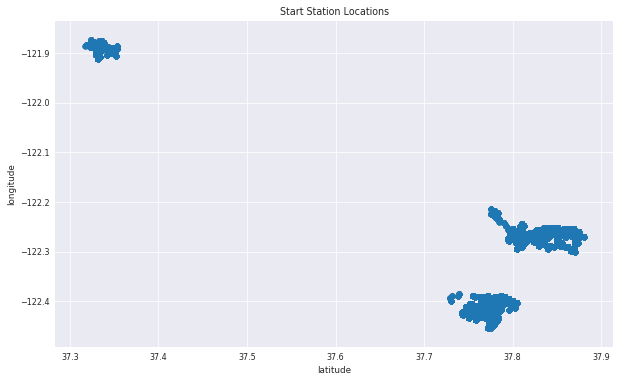

In [87]:
# start staions location

plt.figure(figsize=(10, 6))
plt.scatter(data=trip_data, x='start_station_latitude', y='start_station_longitude');
label(x='latitude', y='longitude', t='Start Station Locations')

> **Most starter stations can be combined into 3 main cluster stations**

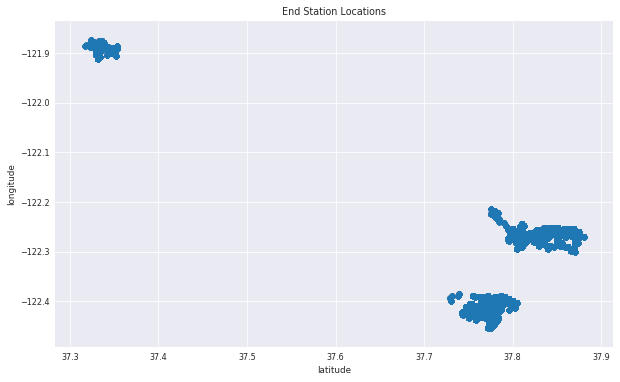

In [88]:
# end staions location

plt.figure(figsize=(10, 6))
plt.scatter(data=trip_data, x='end_station_latitude', y='end_station_longitude');
label(x='latitude', y='longitude', t='End Station Locations')

> **Furthermore, most of end staions can be converted into 3 main clusters (Location)**.

> **It is noticeable that that end and start stations are geographically located in the same places**

 > 2. **What times and days of the week do people travel the most?**

### Days and Day of Week

In [89]:
trip_data['start_time'] = pd.to_datetime(trip_data.start_time, format='%Y-%m-%d %H:%M:%S')

In [90]:

trip_data['start_day'] = trip_data['start_time'].dt.day
trip_data['start_week'] = trip_data['start_time'].dt.day_name() # day_of_week

In [91]:
trip_data

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_gender,bike_share_for_all_trip,member_age,age,start_day,start_week
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,Male,No,17.0,35,28,Thursday
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,Male,No,29.0,47,28,Thursday
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,Other,No,12.0,30,28,Thursday
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,Male,Yes,27.0,45,28,Thursday
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,Male,No,42.0,60,28,Thursday
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,Female,No,18.0,36,28,Thursday
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,Male,No,12.0,30,28,Thursday
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,Other,No,13.0,31,28,Thursday
9,1049,2019-02-28 23:49:47.699,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,Male,No,9.0,27,28,Thursday
10,458,2019-02-28 23:57:57.211,2019-03-01 00:05:35.4350,370.0,Jones St at Post St,37.787327,-122.413278,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,5318,Subscriber,Female,Yes,5.0,23,28,Thursday


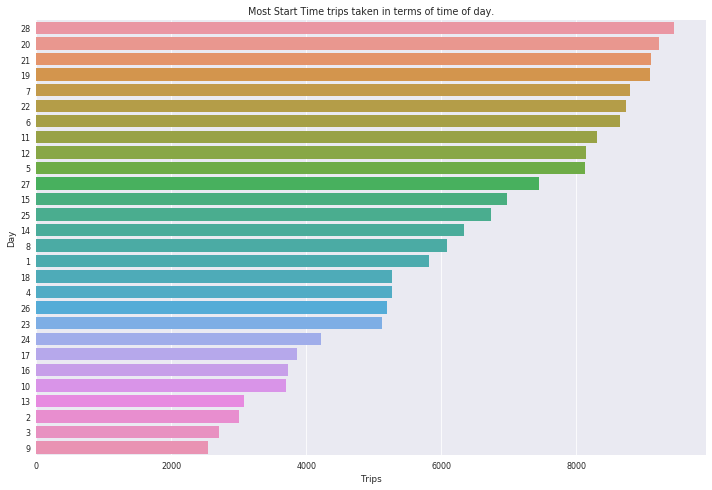

In [92]:
# start time day
days_count = trip_data.start_day.value_counts()

plt.figure(figsize=(12, 8))
sns.countplot(data=trip_data, y='start_day', order=days_count.index);
label(x='Trips', y='Day', t='Most Start Time trips taken in terms of time of day.')

> **The majority of users take starting journeys in the last third of the month and lower trips in the early thirds.**

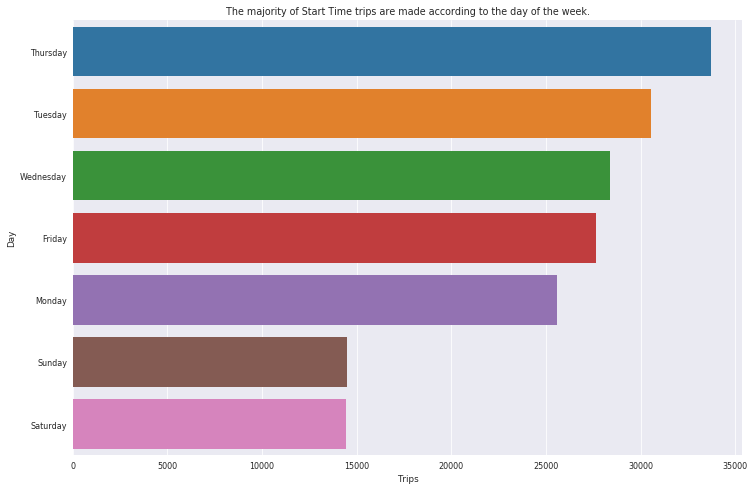

In [93]:
# start time day of week
days_count = trip_data.start_week.value_counts()

plt.figure(figsize=(12, 8))
sns.countplot(data=trip_data, y='start_week', order=days_count.index);
label(x='Trips', y='Day', t='The majority of Start Time trips are made according to the day of the week.')


> **The majority of the starter trips occurred on Thursday (the weekend), while the lower trips occur on Saturday**

In [94]:
trip_data['end_time'] = pd.to_datetime(trip_data.end_time, format='%Y-%m-%d %H:%M:%S')

In [95]:

trip_data['end_day'] = trip_data['end_time'].dt.day
trip_data['end_week'] = trip_data['end_time'].dt.day_name() # day_of_week

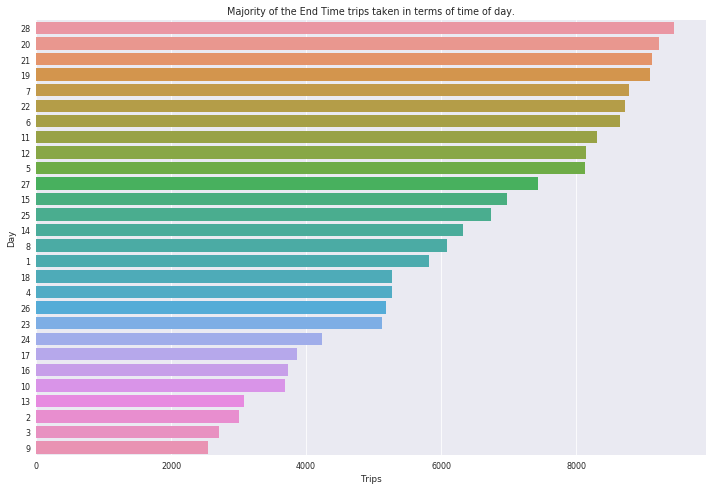

In [96]:
# end time day
days_count = trip_data.end_day.value_counts()

plt.figure(figsize=(12, 8))
sns.countplot(data=trip_data, y='end_day', order=days_count.index);
label(x='Trips', y='Day', t='Majority of the End Time trips taken in terms of time of day.')

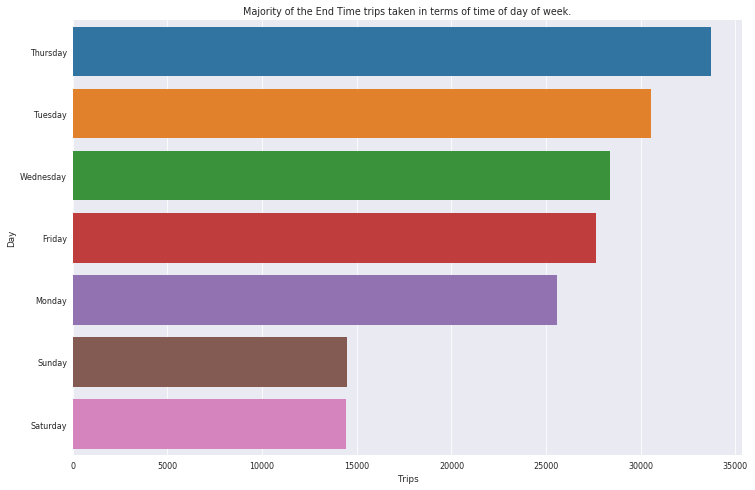

In [97]:
# start time day of week
days_count = trip_data.end_week.value_counts()

plt.figure(figsize=(12, 8))
sns.countplot(data=trip_data, y='end_week', order=days_count.index);
label(x='Trips', y='Day', t='Majority of the End Time trips taken in terms of time of day of week.')

### **which type of user types do trips during the month?**

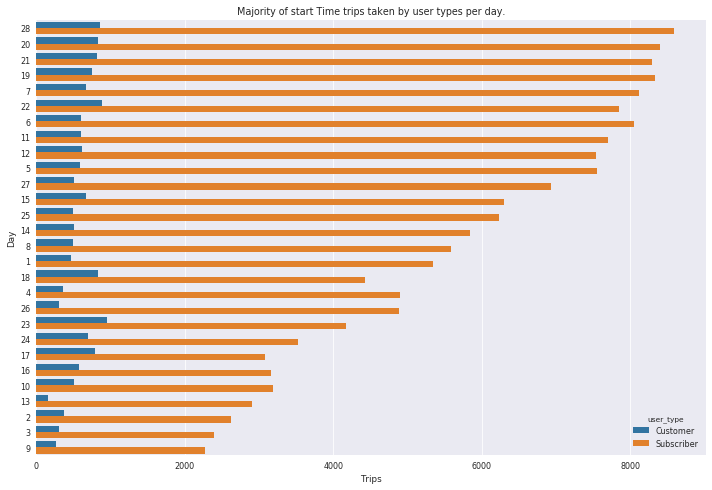

In [98]:
# end time day
days_count = trip_data.start_day.value_counts()

plt.figure(figsize=(12, 8))
sns.countplot(data=trip_data, y='start_day', order=days_count.index, hue='user_type');
label(x='Trips', y='Day', t='Majority of start Time trips taken by user types per day.')

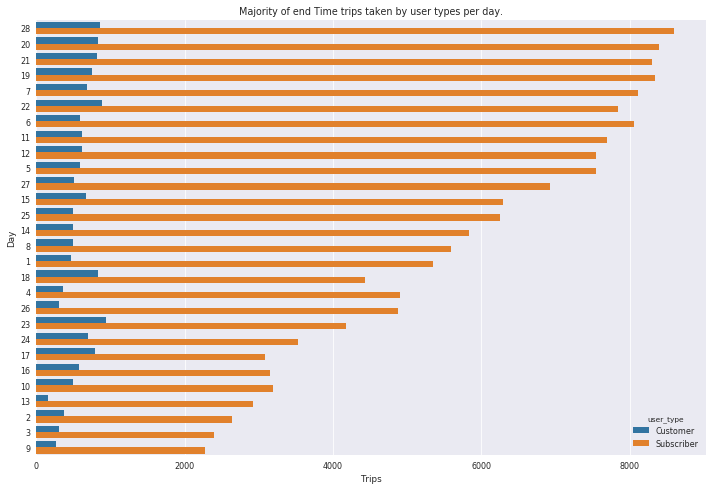

In [99]:
# end time day
days_count = trip_data.end_day.value_counts()

plt.figure(figsize=(12, 8))
sns.countplot(data=trip_data, y='end_day', order=days_count.index, hue='user_type');
label(x='Trips', y='Day', t='Majority of end Time trips taken by user types per day.')

> **In the start and end stations, subscribers make up the majority of users, and on days 23 and 22, there are more customers..**

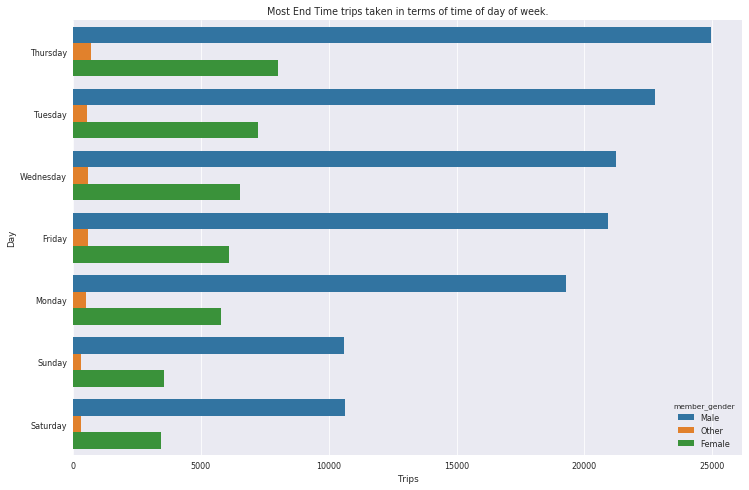

In [100]:
# start time day of week
days_count = trip_data.end_week.value_counts()

plt.figure(figsize=(12, 8))
sns.countplot(data=trip_data, y='end_week', order=days_count.index, hue='member_gender');
label(x='Trips', y='Day', t='Most End Time trips taken in terms of time of day of week.')

> **The weekday gender distribution is consistent with the weekday distribution..**

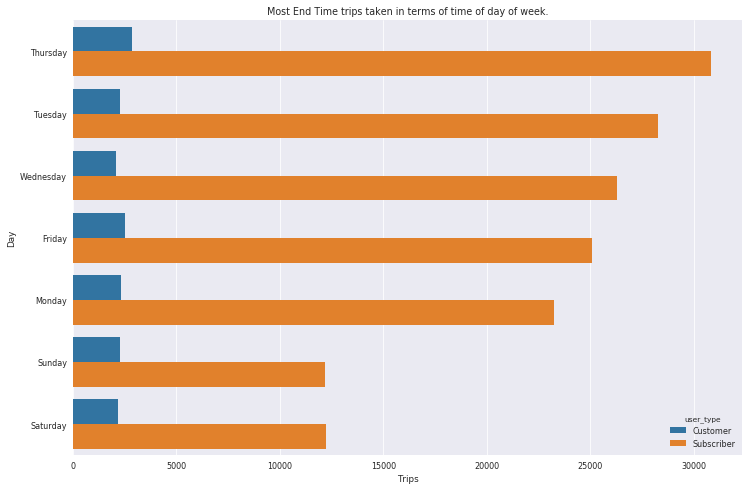

In [101]:
# start time day of week
days_count = trip_data.end_week.value_counts()

plt.figure(figsize=(12, 8))
sns.countplot(data=trip_data, y='end_week', order=days_count.index, hue='user_type');
label(x='Trips', y='Day', t='Most End Time trips taken in terms of time of day of week.')


> **Thursday is when subscribers are most active, and customers are most active during the week.**

**3.Does this depend on a user's status as a subscriber or customer?**

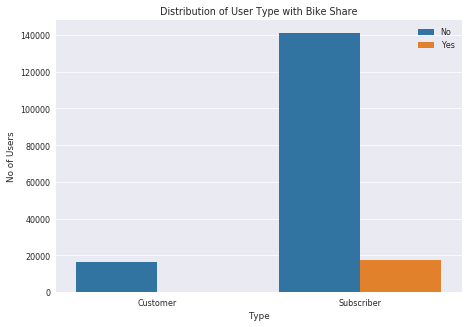

In [102]:
# let's now show no of user_type
plt.figure(figsize=[16, 5])

plt.subplot(1, 2, 1)
sns.countplot(data = trip_data, x = 'user_type', hue='bike_share_for_all_trip')
plt.legend(loc='best', )
label(x='Type', y='No of Users', t='Distribution of User Type with Bike Share')

**Majority of the bike share comes from subscriber user.**

## Multivariate Exploration



## Data Correlations

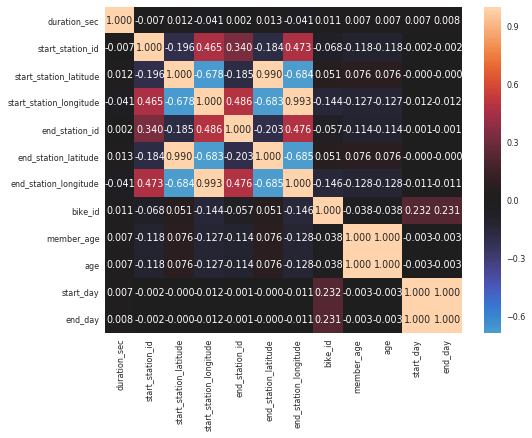

In [103]:
# lets now display the correlation between variables using heatmap
plt.figure(figsize = [8, 6])
corr = trip_data.corr()
sns.heatmap(corr, 
            annot = True, 
            fmt = '.3f', 
            center = 0)
plt.show()

> **Strong correlation appears between similar type features like places and dates. and low correlation between other features**

### **The Relation between Duration, Age and Gender?**

In [104]:
st_df = trip_data.groupby('start_station_name')[['duration_sec', 'age']].mean()

In [105]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=trip_data, x='age', y='duration_sec', hue='member_gender')
label(x='Age', y='Durations', t='Age vs Trip Duration per Station')

AttributeError: module 'seaborn' has no attribute 'scatterplot'

> **The majority of users are in their mid-twenties, and high duration is independent of gender because both genders are represented at the top of the plot.**

In [ ]:
# let's get the relation between age, gender, user type
plt.figure(figsize=(10, 6))

sns.boxplot(data = trip_data, x = 'user_type',  y = 'age', hue='member_gender')

plt.legend(title="Gender")
label(y='Age', x='User Type"', t='age, gender, user type')

> **Subscribers have a slightly wider range (variance) than customers.**

In [ ]:
# let's display the relation between duration, age, user type, gender feature
# create faceted heat maps on the user type variable
graph = sns.FacetGrid(data = trip_data, 
                      col = 'user_type', 
                      hue='member_gender', 
                      hue_order=['Male','Female','Other'], 
                      col_wrap = 6, height = 6
                     )

graph.map(plt.scatter, 'age', 'duration_sec', alpha=0.15)
graph.set_xlabels('Age')
graph.set_ylabels('Duration / Sec')
plt.legend(title="Gender")
plt.show()

> **Users of both types who are middle-aged and older exhibit long trip durations.**

### Station Latitude and Longitude (Locations) Relationships.

In [ ]:
### Station Latitude and Longitude and UserType

plt.figure(figsize=(10, 6))
sns.scatterplot(data=trip_data, 
                x='start_station_latitude', 
                y='start_station_longitude', 
                hue='user_type');

label(y='longitude', x='latitude', t="Station Locations and usertype")

> **Few subscriber users are present in the upper right cluster, which is one of the three primary staions locales (clusters) where subscribers are dispersed.**

In [ ]:
### Station Latitude and Longitude and member_gender

plt.figure(figsize=(10, 6))
sns.scatterplot(data=trip_data, 
                x='start_station_latitude', 
                y='start_station_longitude', 
                hue='member_gender');
label(y='longitude', x='latitude', t="Station Locations and Member Gender")


> **Male uses the three main locations (clusters) more than Females.**

In [ ]:
### Station Latitude and Longitude and bike_share_for_all_trip

plt.figure(figsize=(10, 6))
sns.scatterplot(data=trip_data, 
                x='start_station_latitude', 
                y='start_station_longitude', 
                hue='bike_share_for_all_trip');

label(y='longitude', x='latitude', t="Station Locations and bike_share_for_all_trip")


> **When compared to customers who use bikes from both right locations, users who started their journey from the left cluster are more likely to share their bike for the entire trip.**

<hr>

### Multivariate Exploration Insights

- Correlations between features make sense. 
- Strong correlation appearance between similar type features like locations:
    - **start_station_latitude, start_station_longitude, end_station_latitude and end_station_longitude**

also dates: **start_day, end_day,** 

and correlation close to zero between other features.

- The majority of long-distance trips are taken by people in their mid-twenties, regardless of gender.
- The age range of subscribers is marginally higher than that of customers.
- More than other user kinds, subscribers use the three primary locations..
- Males were more evenly distributed across the three major clusters than females.
- When compared to users who utilize bikes from both right locations, users who started their journey from the left cluster are more likely to share a bike during the entire trip.

In [ ]:
trip_data.to_csv('trip.csv', index=False)